# rbm

<a id="ref1"></a>
<h2>Acquiring the Data</h2>

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#Loading in the movies dataset
# movies_df = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, engine='python')
# movies_df.head()

movies_df = pd.read_csv('ml-100k/movies.dat', sep='::', header=None, engine='python', encoding='ISO-8859-1')
movies_df.head()


,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', header=None, engine='python')
ratings_df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [64]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


<hr>

<a id="ref3"></a>
<h2>The Restricted Boltzmann Machine model</h2>

<img src="https://github.com/fawazsiddiqi/recommendation-system-with-a-Restricted-Boltzmann-Machine-using-tensorflow/blob/master/images/films.png?raw=true"  width="300">

In [48]:
len(movies_df)

3883

In [69]:
user_rating_df = ratings_df.pivot(index='UserID', columns='MovieID', values='Rating')
user_rating_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
UserID,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[1. , 0.6, 0.8, ..., 0. , 0. , 0. ],
       [0.8, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.8, 0.6, 0. , ..., 0. , 0. , 0. ]])

<hr>

In [76]:
hiddenUnits = 20
visibleUnits =  len(user_rating_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #no of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #no of features we are going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [77]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [78]:
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (1682,)
v1 state shape:   (1682,)


In [79]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.49167657


Epoch: 1 batch #: 0  of 1 sample #: 499 reconstruction error: 0.133151
Epoch: 1 batch #: 1  of 1 sample #: 442 reconstruction error: 0.083805
Epoch: 2 batch #: 0  of 1 sample #: 499 reconstruction error: 0.114602
Epoch: 2 batch #: 1  of 1 sample #: 442 reconstruction error: 0.081546
Epoch: 3 batch #: 0  of 1 sample #: 499 reconstruction error: 0.124590
Epoch: 3 batch #: 1  of 1 sample #: 442 reconstruction error: 0.075600
Epoch: 4 batch #: 0  of 1 sample #: 499 reconstruction error: 0.127681
Epoch: 4 batch #: 1  of 1 sample #: 442 reconstruction error: 0.084281
Epoch: 5 batch #: 0  of 1 sample #: 499 reconstruction error: 0.115553
Epoch: 5 batch #: 1  of 1 sample #: 442 reconstruction error: 0.077503


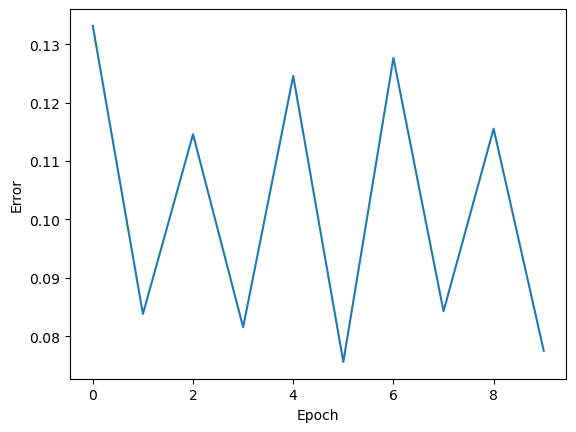

In [80]:
epochs = 5
batchsize = 500
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)



#for i in range(epochs):
#    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
#        batch = trX[start:end]
#        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        prv_w = cur_w
#        prv_vb = cur_vb
#        prv_hb = cur_hb
#    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
#    print (errors[-1])
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

<hr>

<a id="ref5"></a>
<h2>Recommendation</h2>

In [88]:
mock_user_id = 215

In [89]:
#Selecting the input user
inputUser = trX[mock_user_id-1].reshape(1, -1)

inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser

print(v0)
v0.shape

tf.Tensor([0. 0. 0. ... 0. 0. 0.], shape=(1682,), dtype=float32)


TensorShape([1682])

In [90]:
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([1682])

In [91]:
#Feeding in the user and reconstructing the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)

vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)

rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor([0.72067714 0.15908085 0.02909597 ... 0.00150503 0.00219661 0.00098821], shape=(1682,), dtype=float32)


In [92]:
print(rec[0])

tf.Tensor([0.72067714 0.15908085 0.02909597 ... 0.00150503 0.00219661 0.00098821], shape=(1682,), dtype=float32)


20 most recommended movies for user 215

In [96]:
scored_movies_df_mock = movies_df[movies_df['MovieID'].isin(user_rating_df.columns)]
dumm = rec[0][:1637]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = dumm)
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,MovieID,Title,Genres,RecommendationScore
173,175,Kids (1995),Drama,0.961895
49,50,"Usual Suspects, The (1995)",Crime|Thriller,0.939859
171,173,Judge Dredd (1995),Action|Adventure|Sci-Fi,0.930631
180,182,Moonlight and Valentino (1995),Drama|Romance,0.890239
203,205,Unstrung Heroes (1995),Comedy|Drama,0.866480
227,230,Dolores Claiborne (1994),Drama|Thriller,0.825663
167,169,Free Willy 2: The Adventure Home (1995),Adventure|Children's|Drama,0.797195
70,71,Fair Game (1995),Action,0.794149
209,211,"Browning Version, The (1994)",Drama,0.752758
221,224,Don Juan DeMarco (1995),Comedy|Drama|Romance,0.742031


In [97]:
movies_df_mock = ratings_df[ratings_df['UserID'] == mock_user_id]
movies_df_mock.head()

,UserID,MovieID,Rating,Timestamp
349,215,212,2,891435680
475,215,211,4,891436202
913,215,421,4,891435704
1460,215,164,3,891436633
1721,215,423,5,891435526


In [100]:
#Merging movies_df with ratings_df by MovieID
merged_df_mock = scored_movies_df_mock.merge(movies_df_mock, on='MovieID', how='outer')

In [102]:
merged_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,MovieID,Title,Genres,RecommendationScore,UserID,Rating,Timestamp
173,175,Kids (1995),Drama,0.961895,NaN,NaN,NaN
49,50,"Usual Suspects, The (1995)",Crime|Thriller,0.939859,215.0,5.0,891436543.0
171,173,Judge Dredd (1995),Action|Adventure|Sci-Fi,0.930631,NaN,NaN,NaN
180,182,Moonlight and Valentino (1995),Drama|Romance,0.890239,215.0,3.0,891435266.0
203,205,Unstrung Heroes (1995),Comedy|Drama,0.866480,215.0,3.0,891435161.0
227,230,Dolores Claiborne (1994),Drama|Thriller,0.825663,215.0,3.0,891436469.0
167,169,Free Willy 2: The Adventure Home (1995),Adventure|Children's|Drama,0.797195,NaN,NaN,NaN
70,71,Fair Game (1995),Action,0.794149,NaN,NaN,NaN
209,211,"Browning Version, The (1994)",Drama,0.752758,215.0,4.0,891436202.0
221,224,Don Juan DeMarco (1995),Comedy|Drama|Romance,0.742031,NaN,NaN,NaN


<hr>